In [79]:
# -*- coding: utf-8 -*-
#importing the necessary libraries
import sys
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import warnings
warnings.filterwarnings("ignore")


In [80]:
#load the cifar-10 dataset
(train_X, train_y),(test_X,test_y) = cifar10.load_data()

#one hot encoding the labels, transforming integers into 10 dimension binary vector, having 1 for that specific class.
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
#normalize the pixel values from 0-255 to the range of 0-1
train_X = train_X / 255.0
test_X = test_X / 255.0

In [81]:
#define CNN model
model = Sequential()
#convolution layer
#input layer, 32x32 image size having 3 channels
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
#convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
#dropout regularization layer, assigning 0 to random 30% of the data. Done to prevent overfitting
model.add(Dropout(0.3)) 
#max pooling layer with 2x2 sized filter
model.add(MaxPooling2D(pool_size=(2, 2))) 
#convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
#convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
#dropout layer
model.add(Dropout(0.3)) 
#max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2))) 
#Flattening layer. The feature map is converted to a 1-D vector
model.add(Flatten()) 
#dropout layer
model.add(Dropout(0.3))
#full connection layer with output of 512 neurons 
model.add(Dense(512, activation='relu')) 
#dropout layer
model.add(Dropout(0.3)) 
#full connection layer with output of 128 neurons 
model.add(Dense(128, activation='relu')) 
#dropout layer
model.add(Dropout(0.3)) 
#full connection layer with output of 10 neurons, for 10 output classes 
model.add(Dense(10, activation='softmax'))

#learning rate
lrate = 0.01 
#decay of learning rate over time. decay = learning_rate / no_of_epochs
decay = lrate/100 
#stochastic gradient descent optimization algorithm for learning the parameters
sgd = SGD(lr=lrate, momentum=0.9, decay = decay, nesterov=False) 
#compile model using categorical cross-entropy loss function
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Epoch 1/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8500 - accuracy: 0.7002 - val_loss: 0.8485 - val_accuracy: 0.7112
Epoch 2/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7503 - accuracy: 0.7374 - val_loss: 0.8184 - val_accuracy: 0.7247
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6831 - accuracy: 0.7620 - val_loss: 0.7643 - val_accuracy: 0.7414
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6143 - accuracy: 0.7839 - val_loss: 0.7456 - val_accuracy: 0.7446
Epoch 5/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5627 - accuracy: 0.8042 - val_loss: 0.6890 - val_accuracy: 0.7658
Epoch 6/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5069 - accuracy: 0.8207 - val_loss: 0.6911 - val_accuracy: 0.7649
Epoch 7/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4654 - accuracy: 0.8376 - val_loss: 0.6806 - val_ac

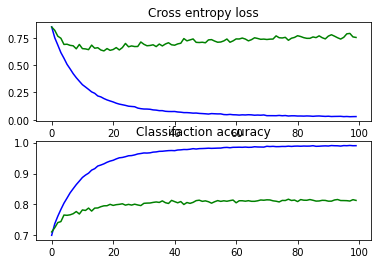

In [83]:
# Training the CNN model with cifar-10 dataset
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y))
_, acc = model.evaluate(test_X, test_y)
print('Accuracy  = %.3f' %(acc*100.0))
# model is saved 
model.save('project_model.h5')

# Analyze the loss and accuracy for training and validation data using history module
pyplot.subplot(211)
pyplot.title('Cross entropy loss')
pyplot.plot(history.history['loss'], color = 'blue', label = 'training data')
pyplot.plot(history.history['val_loss'], color = 'green', label = 'test data')
    
pyplot.subplot(212)
pyplot.title('Classifaction accuracy')
pyplot.plot(history.history['accuracy'], color = 'blue', label = 'training data')
pyplot.plot(history.history['val_accuracy'], color = 'green', label = 'test data')

In [77]:
from keras.models import load_model 
import numpy as np 
from keras.preprocessing import image
from google.colab import drive

#import images from google drive
drive.mount('/content/drive')

#Load the previously saved model
model = load_model('project_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Class no:  [6]
Frog


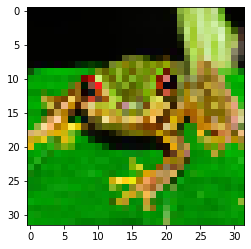

In [85]:
# an image is loaded and shrunk to 32x32 size, i.e same size as the training image data
test_image1 =image.load_img('/content/drive/My Drive/image_classification_cifar-10/photo6.jpg',target_size =(32,32))
#image type is PIL, which stands for Python Image Library.


# image is converted to numpy array as the model is trained on  numpy array object and it can recognize numbers only.
test_image =image.img_to_array(test_image1) 

# image is reshaped according to input shape of 4D tensor (batch, rows, columns,channels )
test_image = test_image.reshape(1,32,32,3)

# normalizing the image like the training data
test_image = test_image.astype('float32')
test_image = test_image / 255.0

# predicting the class in which the given image belongs
result = model.predict_classes(test_image) 

#display the image
import matplotlib.pyplot as plt 
plt.imshow(test_image1)
print('Class no: ',result)

#display name of the class according to class number
if result==0:
  print('Aeroplane')
elif result==1:
  print('Automobile')
elif result==2:
  print('Bird')
elif result==3:
  print('Cat')
elif result==4:
  print('Deer')
elif result==5:
  print('Dog')
elif result==6:
  print('Frog')
elif result==7:
  print('Horse')
elif result==8:
  print('Ship')
elif result==9:
  print('Truck')
